In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Tesla.csv.csv to Tesla.csv.csv


In [ ]:
dataset = pd.read_csv('Tesla.csv.csv')

In [ ]:
print(dataset.head())

        Date       Open   High        Low      Close    Volume  Adj Close
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3   7/2/2010  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4   7/6/2010  20.000000  20.00  15.830000  16.110001   6866900  16.110001


In [ ]:
print(dataset.tail())

           Date        Open        High         Low       Close   Volume  \
1687  3/13/2017  244.820007  246.850006  242.779999  246.169998  3010700   
1688  3/14/2017  246.110001  258.119995  246.020004  258.000000  7575500   
1689  3/15/2017  257.000000  261.000000  254.270004  255.729996  4816600   
1690  3/16/2017  262.399994  265.750000  259.059998  262.049988  7100400   
1691  3/17/2017  264.000000  265.329987  261.200012  261.500000  6475900   

       Adj Close  
1687  246.169998  
1688  258.000000  
1689  255.729996  
1690  262.049988  
1691  261.500000  


In [ ]:
print(dataset.shape)

(1692, 7)


In [ ]:
print(dataset.info)

<bound method DataFrame.info of            Date        Open        High         Low       Close    Volume  \
0     6/29/2010   19.000000   25.000000   17.540001   23.889999  18766300   
1     6/30/2010   25.790001   30.420000   23.299999   23.830000  17187100   
2      7/1/2010   25.000000   25.920000   20.270000   21.959999   8218800   
3      7/2/2010   23.000000   23.100000   18.709999   19.200001   5139800   
4      7/6/2010   20.000000   20.000000   15.830000   16.110001   6866900   
...         ...         ...         ...         ...         ...       ...   
1687  3/13/2017  244.820007  246.850006  242.779999  246.169998   3010700   
1688  3/14/2017  246.110001  258.119995  246.020004  258.000000   7575500   
1689  3/15/2017  257.000000  261.000000  254.270004  255.729996   4816600   
1690  3/16/2017  262.399994  265.750000  259.059998  262.049988   7100400   
1691  3/17/2017  264.000000  265.329987  261.200012  261.500000   6475900   

       Adj Close  
0      23.889999  
1    

In [ ]:
dataset.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


In [ ]:
dataset.duplicated().sum()

np.int64(0)

In [ ]:
dataset.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [ ]:
dataset.describe(include='object')

,Date
count,1692
unique,1692
top,3/17/2017
freq,1


In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.set_index('Date', inplace=True)


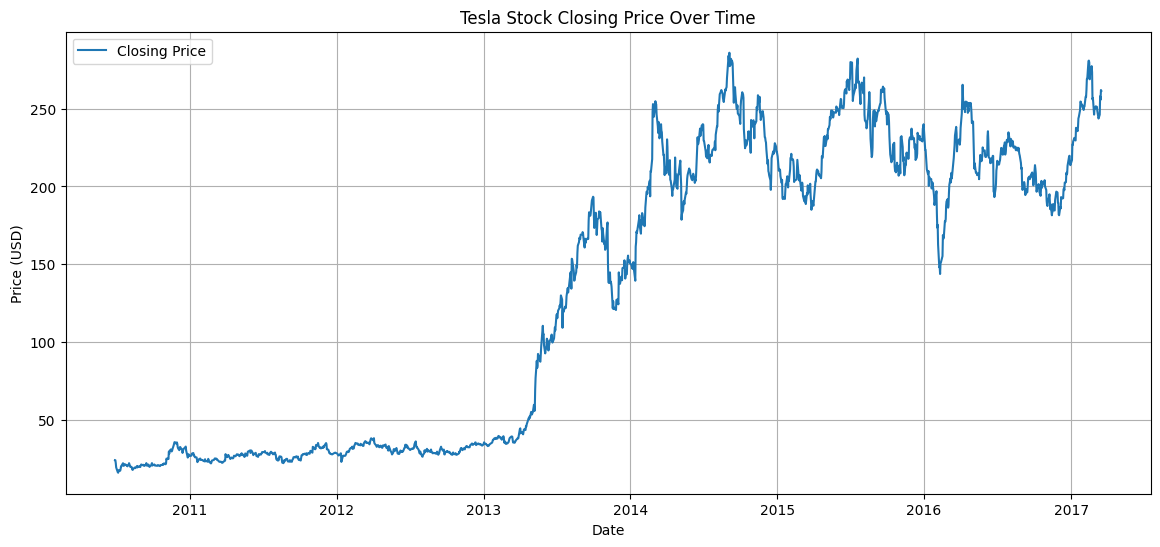

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(dataset['Close'], label='Closing Price')
plt.title('Tesla Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


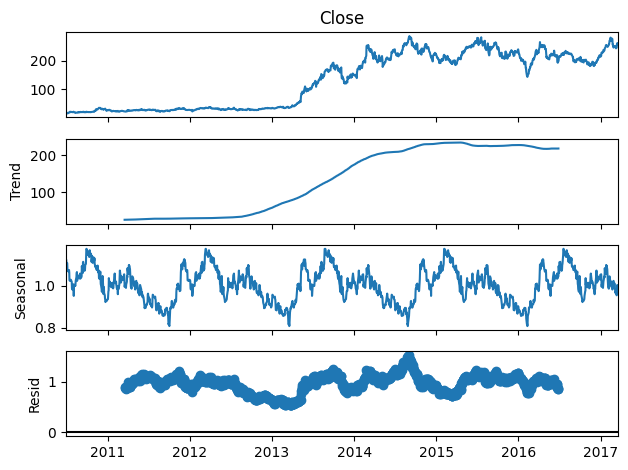

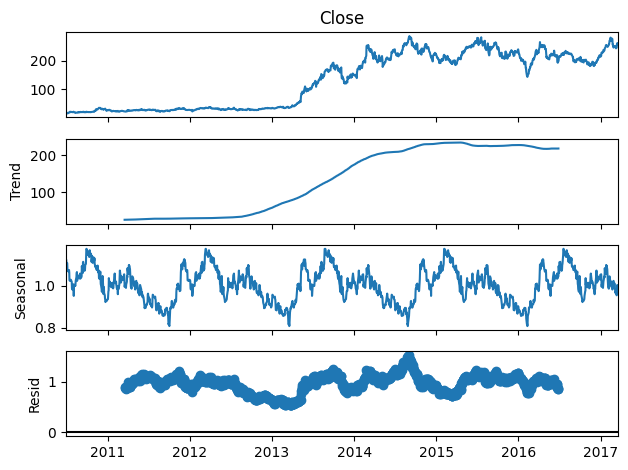

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dataset['Close'], model='multiplicative', period=365)
result.plot()


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dataset['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -0.8137329693176635
p-value: 0.8150547908640393


In [ ]:
data_diff = dataset['Close'].diff().dropna()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(dataset['Close'], order=(5,1,0))  # (p,d,q)
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1692
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4899.833
Date:                Thu, 17 Jul 2025   AIC                           9811.667
Time:                        10:03:43   BIC                           9844.265
Sample:                             0   HQIC                          9823.738
                               - 1692                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0313      0.018      1.746      0.081      -0.004       0.066
ar.L2          0.0002      0.020      0.010      0.992      -0.039       0.040
ar.L3         -0.0210      0.017     -1.223      0.2

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


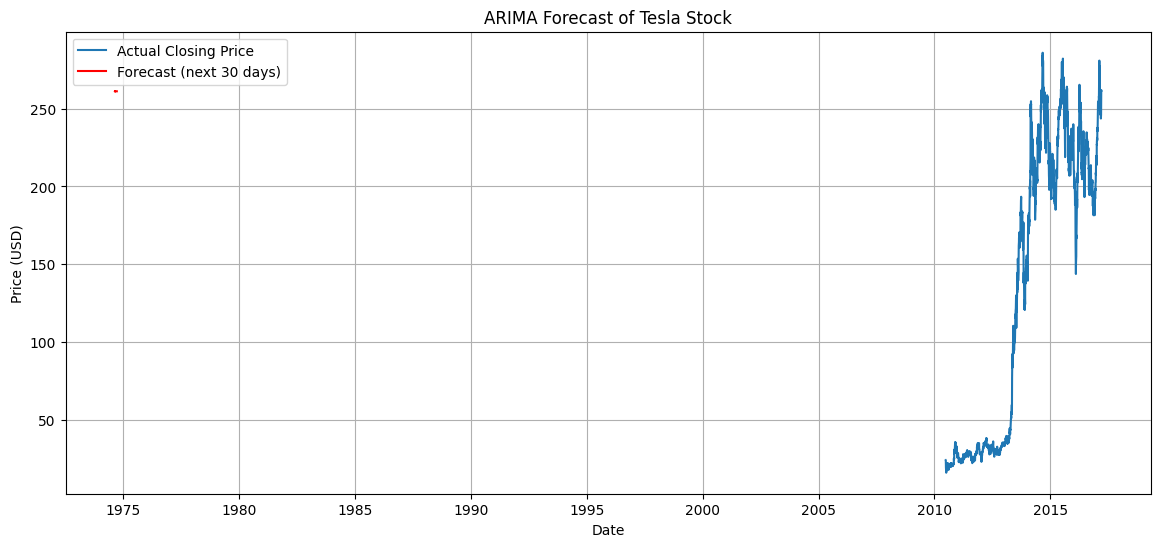

In [ ]:
# Step 1: Forecast the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Step 2: Plot actual + forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(dataset['Close'], label='Actual Closing Price')
plt.plot(forecast.index, forecast, label='Forecast (next 30 days)', color='red')
plt.title('ARIMA Forecast of Tesla Stock')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
!pip install prophet



In [ ]:
from prophet import Prophet
df = dataset.reset_index()[['Date', 'Close']]
df.columns = ['ds', 'y']


In [ ]:
model = Prophet()
model.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptb72mes9/k36894_y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptb72mes9/lmlpk4c_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92963', 'data', 'file=/tmp/tmptb72mes9/k36894_y.json', 'init=/tmp/tmptb72mes9/lmlpk4c_.json', 'output', 'file=/tmp/tmptb72mes9/prophet_modelu0uafihk/prophet_model-20250717100520.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:05:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:05:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=30)  # Forecast next 30 days
forecast = model.predict(future)


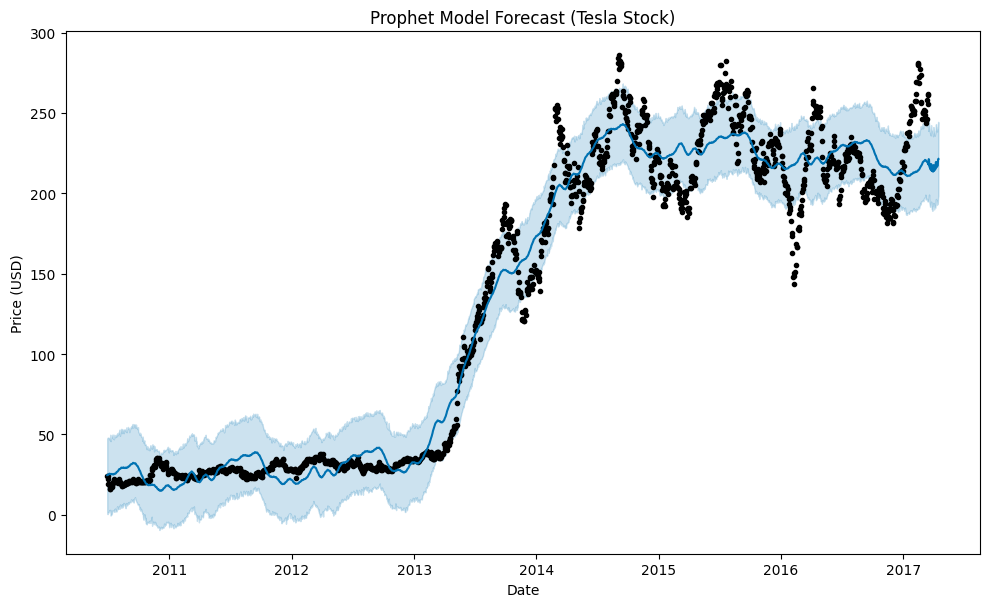

In [ ]:
model.plot(forecast)
plt.title('Prophet Model Forecast (Tesla Stock)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid()
plt.show()


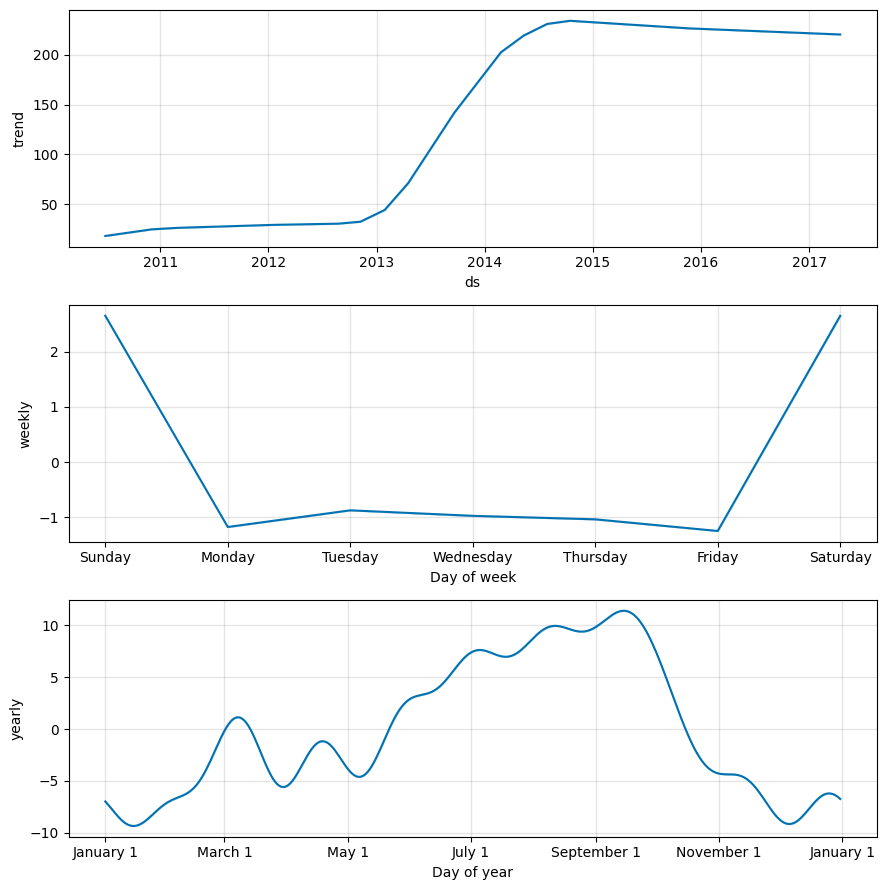

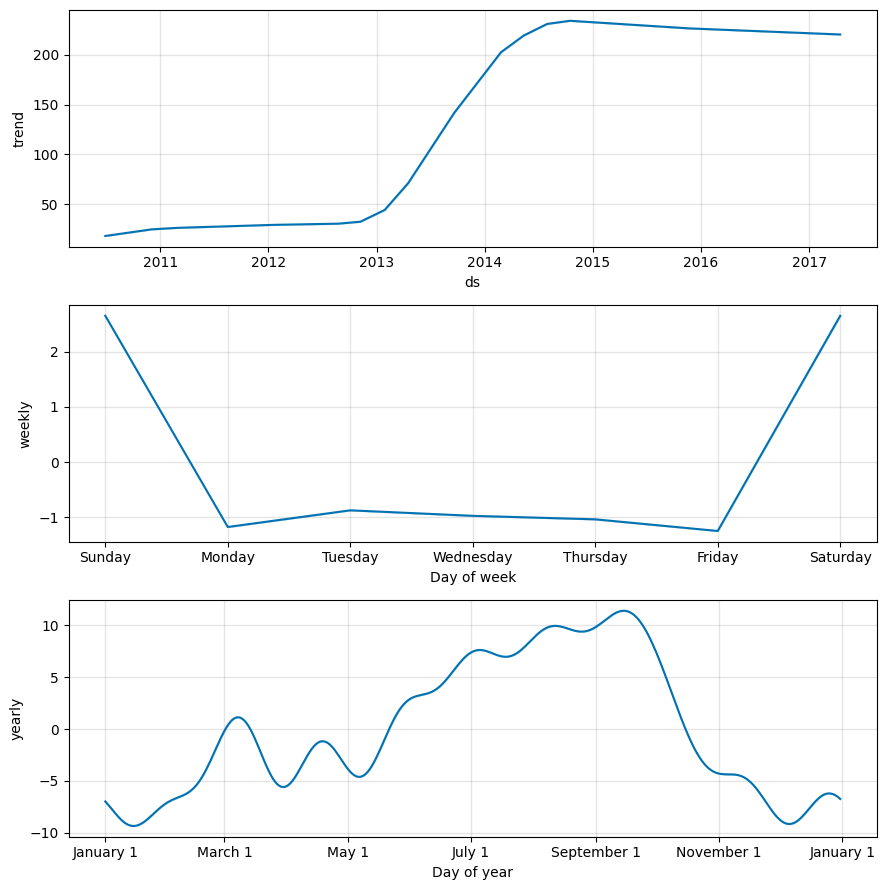

In [ ]:
model.plot_components(forecast)


In [ ]:
!pip install tensorflow


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset[['Close']])


In [ ]:
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshape input for LSTM: [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X, y, epochs=10, batch_size=64, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - loss: 0.1000
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0037
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0017
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0016
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0016
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0017
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0015
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0015
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0013
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0013


In [ ]:
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)
actual = scaler.inverse_transform(y.reshape(-1, 1))


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


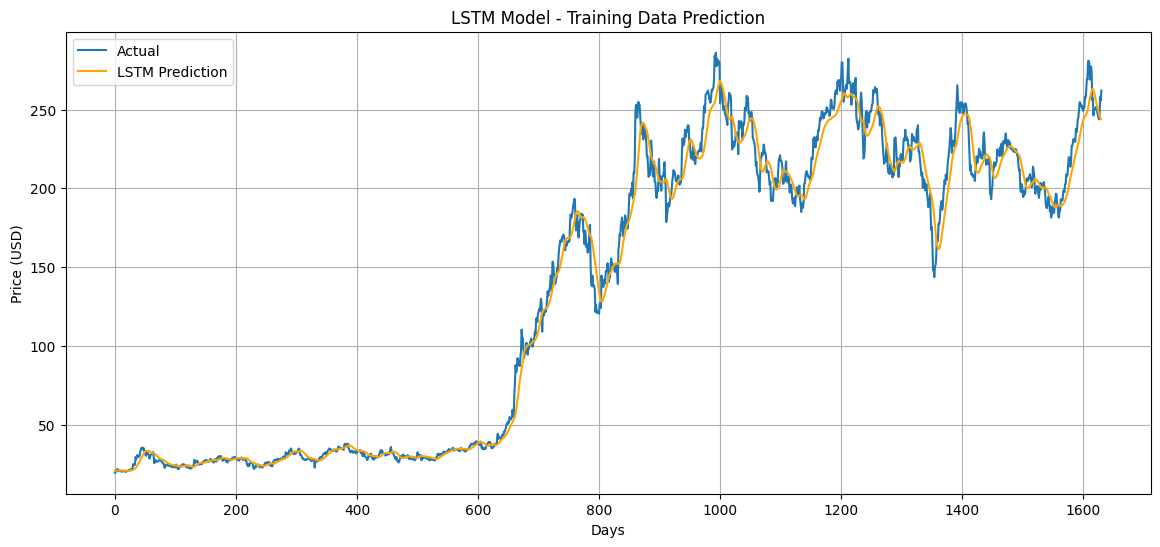

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(actual, label='Actual')
plt.plot(train_predict, label='LSTM Prediction', color='orange')
plt.title('LSTM Model - Training Data Prediction')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Create test data for ARIMA
train_size = int(len(dataset['Close']) * 0.8)
train_arima = dataset['Close'][:train_size]
test_arima = dataset['Close'][train_size:]

# Fit model again on train data
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train_arima, order=(5,1,0))
model_arima_fit = model_arima.fit()

# Forecast same length as test
pred_arima = model_arima_fit.forecast(steps=len(test_arima))
rmse_arima = np.sqrt(mean_squared_error(test_arima, pred_arima))
print("ARIMA RMSE:", rmse_arima)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA RMSE: 24.60729232260739


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from prophet import Prophet

# Prepare prophet data
df = dataset.reset_index()[['Date', 'Close']]
df.columns = ['ds', 'y']
train_prophet = df.iloc[:train_size]
test_prophet = df.iloc[train_size:]

# Fit Prophet
model_prophet = Prophet()
model_prophet.fit(train_prophet)

# Forecast
future = model_prophet.make_future_dataframe(periods=len(test_prophet))
forecast = model_prophet.predict(future)

# Compare forecasted vs actual
pred_prophet = forecast['yhat'].iloc[-len(test_prophet):].values
rmse_prophet = np.sqrt(mean_squared_error(test_prophet['y'], pred_prophet))
print("Prophet RMSE:", rmse_prophet)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptb72mes9/vlfvcl5l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptb72mes9/pmupskx1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49346', 'data', 'file=/tmp/tmptb72mes9/vlfvcl5l.json', 'init=/tmp/tmptb72mes9/pmupskx1.json', 'output', 'file=/tmp/tmptb72mes9/prophet_modelz5d7utzh/prophet_model-20250717100713.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:07:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:07:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: 31.25207296588387


In [ ]:
scaled_data = scaler.fit_transform(dataset[['Close']])

train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - 60:]

X_train, y_train = create_dataset(train_data, 60)
X_test, y_test = create_dataset(test_data, 60)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)

# Predict
lstm_pred = model.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, lstm_pred))
print("LSTM RMSE:", rmse_lstm)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.1409
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0081
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0020
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0013
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0013
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0013
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0013
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0012
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0013
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0013
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
LSTM RMSE: 13.834900843982796


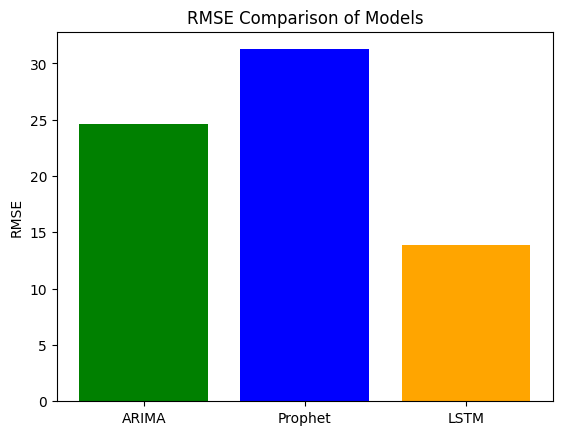

In [ ]:
models = ['ARIMA', 'Prophet', 'LSTM']
rmses = [rmse_arima, rmse_prophet, rmse_lstm]

plt.bar(models, rmses, color=['green', 'blue', 'orange'])
plt.title('RMSE Comparison of Models')
plt.ylabel('RMSE')
plt.show()
